In [1]:
!pip3 install statsmodels

  Using cached https://files.pythonhosted.org/packages/60/d6/e9859e68e7d6c916fdff7d8e0958a7f5813485c52fc20d061273eaaddb0c/statsmodels-0.10.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/ea/0c/5f61f1a3d4385d6bf83b83ea495068857ff8dfb89e74824c6e9eb63286d8/patsy-0.5.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/86/12/08b092f6fc9e4c2552e37add0861d0e0e0d743f78f1318973caad970b3fc/pandas-0.25.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/29/50/a552a5aff252ae915f522e44642bb49a7b7b31677f9580cfd11bcc869976/scipy-1.3.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/0e/46/ae6773894f7eacf53308086287897ec568eac9768918d913d5b9d366c5db/numpy-1.17.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl
  Using cache

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot


In [3]:
sns.set(color_codes=True)

Source:India Meterological Department/Ministry of Earth Science/Govt. of india

In [4]:
data = pd.read_excel('data/daily.xlsx')

In [5]:
!pip3 install xlrd

  Using cached https://files.pythonhosted.org/packages/b0/16/63576a1a001752e34bf8ea62e367997530dc553b689356b9879339cf45a4/xlrd-1.2.0-py2.py3-none-any.whl


In [6]:
data

,rainfall (mm/day),PET (mm/day),Q (mm/day),avg Temperature,Date,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,1951,1,1
1,NaN,NaN,NaN,NaN,1951,1,2
2,NaN,NaN,NaN,NaN,1951,1,3
3,NaN,NaN,NaN,NaN,1951,1,4
4,NaN,NaN,NaN,NaN,1951,1,5
...,...,...,...,...,...,...,...
23371,0.0,3.646389,0.033444,19.805,2014,12,27
23372,0.0,3.794536,0.032650,19.525,2014,12,28
23373,0.0,3.897361,0.031907,19.535,2014,12,29
23374,0.0,3.752435,0.031208,19.695,2014,12,30


In [7]:
data.columns

Index(['rainfall (mm/day)', 'PET (mm/day)', 'Q (mm/day)', 'avg Temperature',
       'Date ', 'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

About variables:
Rainfall:
PET
Q
avg Temp
Date


In [8]:
data.columns = ['Rainfall', 'PET (mm/day)', 'Q (mm/day)', 'Temperature',
       'Year', 'Month', 'Day']

In [9]:
data.head(2)

,Rainfall,PET (mm/day),Q (mm/day),Temperature,Year,Month,Day
0,NaN,NaN,NaN,NaN,1951,1,1
1,NaN,NaN,NaN,NaN,1951,1,2


In [10]:
req_data = data[['Rainfall','Temperature',
       'Year', 'Month', 'Day']]

In [11]:
df = req_data.loc[req_data['Year'] != 1951]

In [12]:
df

,Rainfall,Temperature,Year,Month,Day
365,0.0,21.140,1952,1,1
366,0.0,21.085,1952,1,2
367,0.0,21.020,1952,1,3
368,0.0,21.145,1952,1,4
369,0.0,21.390,1952,1,5
...,...,...,...,...,...
23371,0.0,19.805,2014,12,27
23372,0.0,19.525,2014,12,28
23373,0.0,19.535,2014,12,29
23374,0.0,19.695,2014,12,30


In [13]:
df = df.round({"Rainfall":2, "Temperature":2}) 

In [14]:
df

,Rainfall,Temperature,Year,Month,Day
365,0.0,21.14,1952,1,1
366,0.0,21.08,1952,1,2
367,0.0,21.02,1952,1,3
368,0.0,21.14,1952,1,4
369,0.0,21.39,1952,1,5
...,...,...,...,...,...
23371,0.0,19.80,2014,12,27
23372,0.0,19.52,2014,12,28
23373,0.0,19.54,2014,12,29
23374,0.0,19.70,2014,12,30


In [15]:
gb_df = df.groupby(['Year', 'Month'],as_index=False) 

monthly = gb_df['Rainfall','Temperature'].agg({
    'Rainfall':[max,sum],
    'Temperature':['mean',min,max]
})

monthly.columns = monthly.columns.droplevel(0)

monthly.columns = ['year','month','max_rainfall','total_rainfall','avg_temp','min_temp','max_temp']

monthly.to_csv('rainfall_per_year(monthwise).csv')

In [16]:
# plt.bar(monthly['year'],monthly['total_rainfall'])
# plt.title('rainfall(mm) trend per year')
# plt.xlabel('years')
# plt.ylabel('rainfall(mm)')
# plt.show()

In [17]:
# Renaming columns
# gb_df.agg(
#     max_rainfall=('Rainfall',max),
#     total_rainfall=('Rainfall',sum),
#     min_temp = ('Temperature',min),
#     max_temp = ('Temperature',max),
#     avg_temp = ('Temperature','mean')
# )

In [18]:
gb_df = df.groupby(['Year'],as_index=False) 
# gb_df.mean()
yearly = gb_df['Rainfall','Temperature'].agg({
    'Rainfall':[max,sum],
    'Temperature':['mean',min,max]
})

yearly.columns = yearly.columns.droplevel(0)

yearly.columns = ['year','max_rainfall','total_rainfall','avg_temp','min_temp','max_temp']
yearly
monthly.to_csv('rainfall_per_year.csv')

In [19]:
month_agg = df.groupby('Month',as_index=False).agg({
    'Rainfall':[max,sum],
    'Temperature':['mean',min,max]
})
month_agg.columns = ['month','max_rainfall','total_rainfall','avg_temp','min_temp','max_temp']
month_agg.to_csv('monthly_trend.csv')

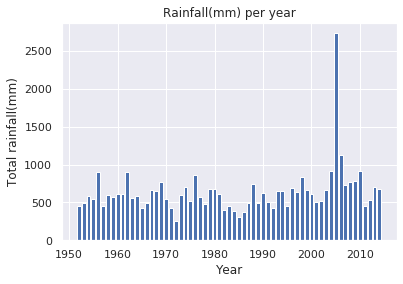

In [20]:
plt.bar(yearly['year'],yearly['total_rainfall'])
plt.title('Rainfall(mm) per year')
plt.xlabel('Year')
plt.ylabel('Total rainfall(mm)')
plt.show()

# Outliers removed(2005 and 2006)

In [21]:
# yearly_new = yearly.drop(yearly[(yearly['year'] == 2006) & (yearly['year'] == 2005)].index)
yearly_new = yearly.drop(yearly[(yearly['year'] == 2005)].index)
yearly_new = yearly_new.drop(yearly_new[(yearly_new['year'] == 2006)].index)
yearly_new.to_csv('Yearly_outliers(2005,2006)_remove.csv')

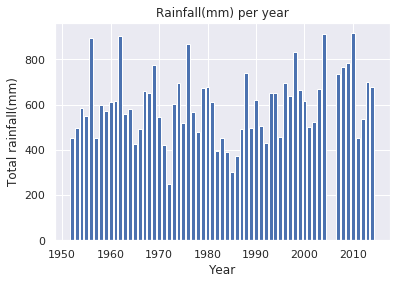

In [22]:
plt.bar(yearly_new['year'],yearly_new['total_rainfall'])
plt.title('Rainfall(mm) per year')
plt.xlabel('Year')
plt.ylabel('Total rainfall(mm)')
plt.show()

In [23]:
total_rainfall = yearly_new['total_rainfall']

In [24]:
mean = total_rainfall.mean()

In [25]:
total_rainfall.median()

596.5800000000002

In [26]:
total_rainfall.min()

251.16999999999996

In [27]:
total_rainfall.max()

916.1100000000001

In [28]:
std =total_rainfall.std()

* If skewness is less than -1 or greater than 1, the distribution is highly skewed.
* If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
* If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [29]:
total_rainfall.skew()

0.2543868857501806

In [30]:
total_rainfall.kurtosis()

-0.12635377177098706

(array([ 2.,  1.,  5., 12.,  9.,  9., 12.,  5.,  1.,  5.]),
 array([251.17 , 317.664, 384.158, 450.652, 517.146, 583.64 , 650.134,
        716.628, 783.122, 849.616, 916.11 ]),
 <a list of 10 Patch objects>)

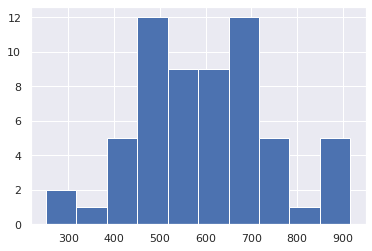

In [31]:
plt.hist(total_rainfall)

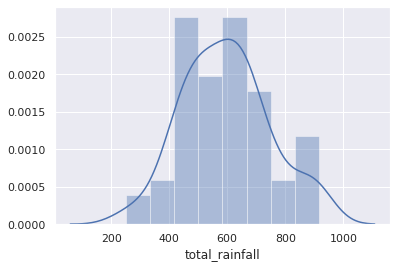

In [32]:
# x = np.random.normal(size=100)
sns.distplot(total_rainfall);

# for normal distribution
* P(mean - 1 * std <= X <= mean + 1 * std) ~ .68
* P(mean - 2 * std <= X <= mean + 2 * std) ~ .95
* P(mean - 3 * std <= X <= mean + 3 * std) ~ .99

In [33]:
#for 68 % confidence interval
min = mean - 1 * std
max = mean + 1 * std
str = "with 68 % probability we can say that annual rainfall will lie between range [{} , {}]"
print(str.format(min,max))

with 68 % probability we can say that annual rainfall will lie between range [446.15371470155264 , 746.3669410361522]


In [34]:
#for 95 % confidence interval
min = mean - 2 * std
max = mean + 2 * std
str = "with 95 % probability we can say that annual rainfall will lie between range [{} , {}]"
print(str.format(min,max))

with 95 % probability we can say that annual rainfall will lie between range [296.0471015342529 , 896.473554203452]


# CDF

(array([0.01639344, 0.01639344, 0.03278689, 0.03278689, 0.03278689,
        0.04918033, 0.08196721, 0.1147541 , 0.13114754, 0.21311475,
        0.26229508, 0.32786885, 0.37704918, 0.42622951, 0.47540984,
        0.52459016, 0.60655738, 0.62295082, 0.72131148, 0.78688525,
        0.81967213, 0.85245902, 0.85245902, 0.90163934, 0.90163934,
        0.90163934, 0.91803279, 0.93442623, 0.93442623, 1.        ]),
 array([251.17      , 273.33466667, 295.49933333, 317.664     ,
        339.82866667, 361.99333333, 384.158     , 406.32266667,
        428.48733333, 450.652     , 472.81666667, 494.98133333,
        517.146     , 539.31066667, 561.47533333, 583.64      ,
        605.80466667, 627.96933333, 650.134     , 672.29866667,
        694.46333333, 716.628     , 738.79266667, 760.95733333,
        783.122     , 805.28666667, 827.45133333, 849.616     ,
        871.78066667, 893.94533333, 916.11      ]),
 <a list of 30 Patch objects>)

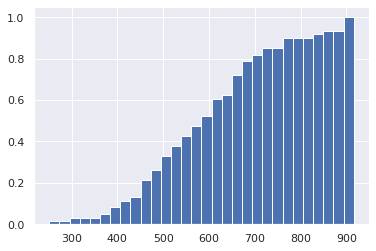

In [35]:
# sns.distplot(total_rainfall,hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
# sns.kdeplot(total_rainfall,cumulative=True)
plt.hist(total_rainfall,cumulative=True, density=True, bins=30)

# Normality test

* kstest

In [36]:
test= stats.kstest(total_rainfall,'norm')
print(test)

KstestResult(statistic=1.0, pvalue=0.0)


* qqplot

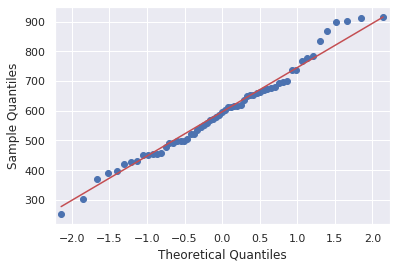

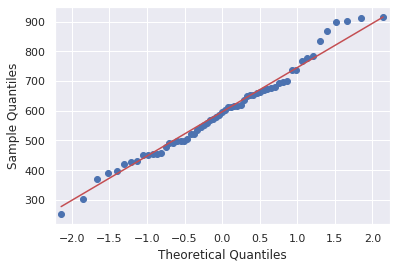

In [37]:
qqplot(total_rainfall, line='s')

* Shapiro-Wilk Test

In [38]:
stat, p = stats.shapiro(total_rainfall)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.981, p=0.458
Sample looks Gaussian (fail to reject H0)


## D’Agostino’s K^2 Test

In [39]:
stat, p = stats.normaltest(total_rainfall)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.739, p=0.691
Sample looks Gaussian (fail to reject H0)


# Seasonal rainfall distribution

In [77]:
# july-sept
# oct-mar
# apr - june

janMar = month_agg[0:3]["total_rainfall"].sum() #rabi 2
aprJune = month_agg[3:6]["total_rainfall"].sum() #jaid
julySept = month_agg[6:9]["total_rainfall"].sum() #kharif
octDec = month_agg[9:12]["total_rainfall"].sum() #rabi 1

# plt.bar(['jan-mar','apr-june','july-sept','oct-dec'],[janMar,aprJune,julySept,octDec])
month_agg

,month,max_rainfall,total_rainfall,avg_temp,min_temp,max_temp
0,1,19.90,90.13,21.604173,15.21,25.64
1,2,9.38,47.80,23.365034,15.48,27.98
2,3,15.05,138.76,26.621787,19.93,30.62
3,4,22.08,253.18,29.541762,24.56,33.57
4,5,68.71,924.63,30.614060,25.97,34.54
5,6,320.34,7648.49,28.366693,23.69,33.15
6,7,132.59,9090.17,26.074578,23.24,29.94
7,8,96.67,7471.99,25.362028,22.92,27.95
8,9,122.58,8898.80,25.781889,22.62,29.24
9,10,78.12,3874.59,26.138372,22.30,29.86


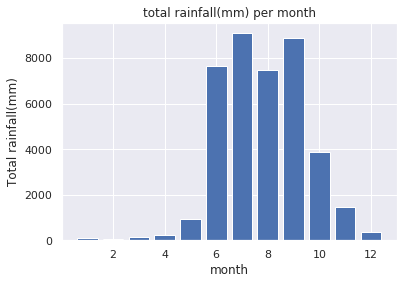

In [72]:
plt.bar(month_agg['month'],month_agg['total_rainfall'])
plt.title('total rainfall(mm) per month')
plt.xlabel('month')
plt.ylabel('Total rainfall(mm)')
plt.show()

In [43]:
gb_df = df.groupby(['Year','Month'],as_index=False)
year_month=gb_df['Rainfall'].sum()
july_trend = year_month[year_month['Month'] == 6]
july_trend

,Year,Month,Rainfall
5,1952,6,112.57
17,1953,6,90.68
29,1954,6,102.80
41,1955,6,43.84
53,1956,6,39.21
...,...,...,...
701,2010,6,175.65
713,2011,6,72.76
725,2012,6,30.95
737,2013,6,172.01


In [ ]:
plt.plot(july_trend['Year'],july_trend['Rainfall'])